<a href="https://colab.research.google.com/github/jialush/6189HW/blob/master/HW2_Wang_Jialu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [3]:
#import data
from google.colab import files
uploaded=files.upload()


Saving TSLA.csv to TSLA.csv


In [72]:
import io
df=pd.read_csv(io.StringIO(uploaded['TSLA.csv'].decode('utf-8')),sep=',')
df.shape
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


In [73]:
#split dataset to training and testing
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

In [74]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set = sc.fit_transform(test_set)

# 1 day lag 60 time-step
## dropout rate-0.2, epoch=100, number of layers=5  
### training error=0.0029

In [75]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) #1 day lag
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [128]:
X_train.shape[1]

60

In [77]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 0s 15ms/step - loss: 0.0631
Epoch 2/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0160
Epoch 3/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0125
Epoch 4/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0120
Epoch 5/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0131
Epoch 6/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0129
Epoch 7/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0122
Epoch 8/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0120
Epoch 9/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0105
Epoch 10/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0103
Epoch 11/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0103
Epoch 12/100
24/24 [==============================] - 0s 14ms/step - loss: 0.0095
Epoch 13/100
24/24 [=====

In [78]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [79]:
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

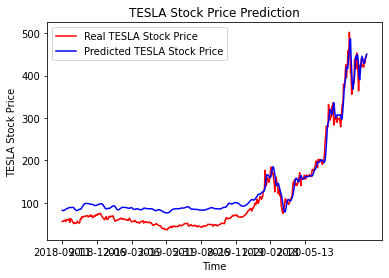

In [80]:
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 1 day lag 30 time-step
## dropout rate-0.2, epoch=100, number of layers=5  
### training error=0.0028
### Shortening time-step doesn't significant improve test error (can be observed in Plot)

Epoch 1/100
25/25 [==============================] - 0s 11ms/step - loss: 0.0683
Epoch 2/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 3/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0127
Epoch 4/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 5/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0126
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 7/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 8/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 9/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 10/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0119
Epoch 11/100
25/25 [==============================] - 0s 10ms/step - loss: 0.0107
Epoch 12/100
25/25 [==============================] - 0s 9ms/step - loss: 0.0105
Epoch 13/100
25/25 [==========

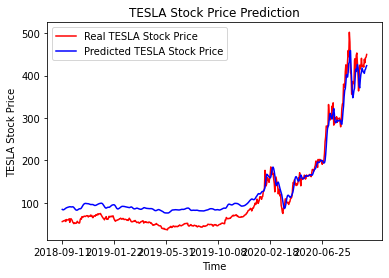

In [117]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(30, 800):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0]) #1 day lag
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 30, 1)
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(30, 558):
    X_test.append(inputs[i-30:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,90))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 1 day lag 60 time-step
## dropout rate=0.05, epoch=100, number of layers=5  
### training error=0.0020
### Decrease dropout rate doesn't improves of test error (can be observed in Plot)

Epoch 1/100
24/24 [==============================] - 0s 16ms/step - loss: 0.0585
Epoch 2/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0117
Epoch 3/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0101
Epoch 4/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0096
Epoch 5/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0090
Epoch 6/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0089
Epoch 7/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0091
Epoch 8/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0081
Epoch 9/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0086
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0082
Epoch 11/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0073
Epoch 12/100
24/24 [==============================] - 0s 13ms/step - loss: 0.0061
Epoch 13/100
24/24 [=====

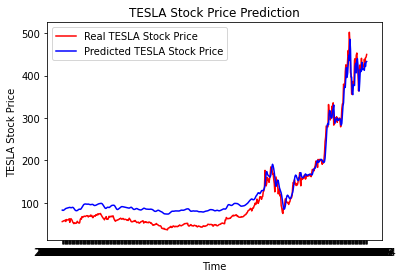

In [129]:


# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) #1 day lag
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 30, 1)
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,90))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 1 day lag 60 time-step
## dropout rate-0.2, epoch=200, number of layers=5  
### training error=0.0014
### Increase epoch significant improves of test error (can be observed in Plot)


Epoch 1/200
24/24 [==============================] - 0s 16ms/step - loss: 0.0712
Epoch 2/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0132
Epoch 3/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0101
Epoch 4/200
24/24 [==============================] - 0s 12ms/step - loss: 0.0091
Epoch 5/200
24/24 [==============================] - 0s 12ms/step - loss: 0.0096
Epoch 6/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0090
Epoch 7/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0099
Epoch 8/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0084
Epoch 9/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0080
Epoch 10/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0073
Epoch 11/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0076
Epoch 12/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0060
Epoch 13/200
24/24 [=====

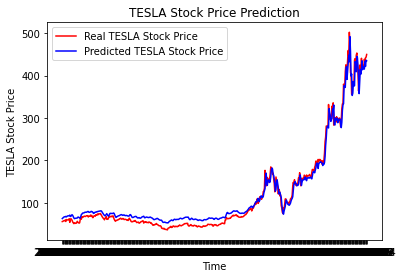

In [132]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) #1 day lag
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 30, 1)
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 32)
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(df.loc[800:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
#plt.xticks(np.arange(0,459,30))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 7 days lag 60 time step: 
## dropout rate=0.2, epoch=100, number of layers=5  
### training error=0.0050

In [83]:
p=7-1 #lag days-1

In [84]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800-p):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i+p, 0]) #7 day lag
    #X_train.append(training_set_scaled[i-60:i, 0])
    #y_train.append(training_set_scaled[i+13, 0]) #14 day lag

In [85]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(734=800-(p-1), 60, 1)

In [86]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
history=model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0748
Epoch 2/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0211
Epoch 3/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0148
Epoch 4/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0166
Epoch 5/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0168
Epoch 6/100
23/23 [==============================] - 0s 15ms/step - loss: 0.0150
Epoch 7/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0145
Epoch 8/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0162
Epoch 9/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0149
Epoch 10/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0165
Epoch 11/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0142
Epoch 12/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0157
Epoch 13/100
23/23 [=====

In [87]:
# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

(522, 60, 1)
(522,)


In [88]:
#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

(522, 1)


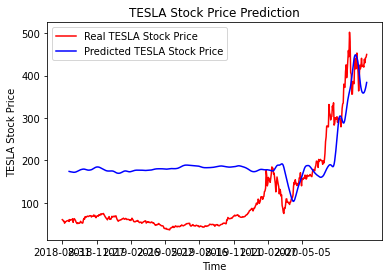

In [89]:
# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()


# 7 days lag 60 time step: 
## dropout rate=0.2, epoch=100, number of layers=5  
### training error=0.0067
### Increase dropout rate worsen test error (can be observed in Plot)

Epoch 1/100
23/23 [==============================] - 0s 16ms/step - loss: 0.0743
Epoch 2/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0234
Epoch 3/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0197
Epoch 4/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0177
Epoch 5/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0177
Epoch 6/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0171
Epoch 7/100
23/23 [==============================] - 0s 14ms/step - loss: 0.0180
Epoch 8/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0172
Epoch 9/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0177
Epoch 10/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0170
Epoch 11/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0177
Epoch 12/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0173
Epoch 13/100
23/23 [=====

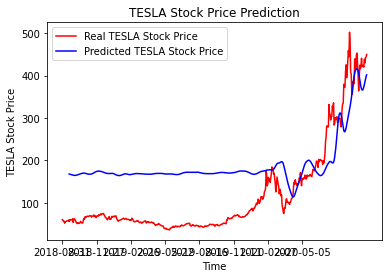

In [90]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.3))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.3))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.3))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()



# 7 days lag 60 time step: 
## dropout rate=0.3, epoch=100, number of layers=5  
### training error=0.0024
### Increase epoch significant improves test error (can be observed in Plot)

Epoch 1/200
23/23 [==============================] - 0s 17ms/step - loss: 0.0747
Epoch 2/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0199
Epoch 3/200
23/23 [==============================] - 0s 14ms/step - loss: 0.0169
Epoch 4/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0169
Epoch 5/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0152
Epoch 6/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0157
Epoch 7/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0153
Epoch 8/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0142
Epoch 9/200
23/23 [==============================] - 0s 14ms/step - loss: 0.0151
Epoch 10/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0155
Epoch 11/200
23/23 [==============================] - 0s 14ms/step - loss: 0.0149
Epoch 12/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0137
Epoch 13/200
23/23 [=====

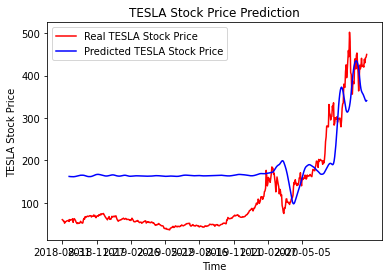

In [93]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()


# 7 days lag 60 time step: 
## dropout rate=0.05, epoch=200, number of layers=5  
### training error=0.0014
### Decrease dropout rate significant improves test error (can be observed in Plot)

Epoch 1/200
24/24 [==============================] - 0s 15ms/step - loss: 0.0649
Epoch 2/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0150
Epoch 3/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0116
Epoch 4/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0106
Epoch 5/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0094
Epoch 6/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0095
Epoch 7/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0092
Epoch 8/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0082
Epoch 9/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0107
Epoch 10/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0082
Epoch 11/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0078
Epoch 12/200
24/24 [==============================] - 0s 13ms/step - loss: 0.0075
Epoch 13/200
24/24 [=====

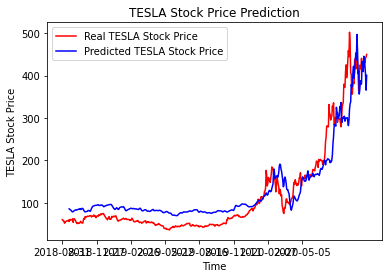

In [131]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 14 days lag 60 time step: 
## dropout rate=0.05, epoch=200, number of layers=5  
### training error=0.0020
### Increase time-lag worsen test error (can be observed in Plot)

Epoch 1/200
23/23 [==============================] - 0s 17ms/step - loss: 0.0605
Epoch 2/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0197
Epoch 3/200
23/23 [==============================] - 0s 12ms/step - loss: 0.0173
Epoch 4/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0171
Epoch 5/200
23/23 [==============================] - 0s 12ms/step - loss: 0.0178
Epoch 6/200
23/23 [==============================] - 0s 12ms/step - loss: 0.0171
Epoch 7/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0165
Epoch 8/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0163
Epoch 9/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0169
Epoch 10/200
23/23 [==============================] - 0s 12ms/step - loss: 0.0164
Epoch 11/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0170
Epoch 12/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0161
Epoch 13/200
23/23 [=====

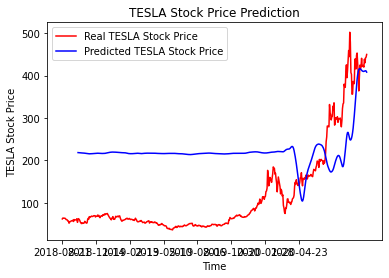

In [133]:
p=14
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800-p):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i+p, 0]) #7 day lag
    #X_train.append(training_set_scaled[i-60:i, 0])
    #y_train.append(training_set_scaled[i+13, 0]) #14 day lag
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(734=800-(p-1), 60, 1)

#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()


# 14 days lag 60 time step: 
## dropout rate=0.05, epoch=300, number of layers=5  
### training error=0.0013
### Increase epoch significant improves test error (can be observed the trend in Plot)

Epoch 1/200
23/23 [==============================] - 0s 16ms/step - loss: 0.0687
Epoch 2/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0199
Epoch 3/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0177
Epoch 4/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0161
Epoch 5/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0169
Epoch 6/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0170
Epoch 7/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0159
Epoch 8/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0166
Epoch 9/200
23/23 [==============================] - 0s 14ms/step - loss: 0.0160
Epoch 10/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0171
Epoch 11/200
23/23 [==============================] - 0s 12ms/step - loss: 0.0169
Epoch 12/200
23/23 [==============================] - 0s 13ms/step - loss: 0.0169
Epoch 13/200
23/23 [=====

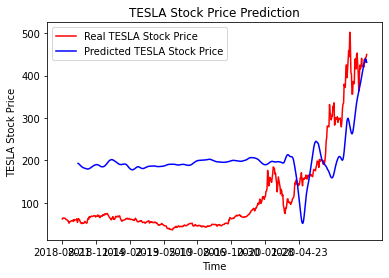

In [134]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 200, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()

# 14 days lag 60 time step: 
## dropout rate=0.05, epoch=200, number of layers=5  
### training error=0.0010
### Increase number of neurons in each layer causes over fitting problem (can be observed in Plot, i.e. the predicted blue line has raised points which actually not it the actual red curve)

Epoch 1/300
23/23 [==============================] - 0s 19ms/step - loss: 0.0514
Epoch 2/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0174
Epoch 3/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0178
Epoch 4/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0186
Epoch 5/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0165
Epoch 6/300
23/23 [==============================] - 0s 14ms/step - loss: 0.0170
Epoch 7/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0157
Epoch 8/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0176
Epoch 9/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0159
Epoch 10/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0152
Epoch 11/300
23/23 [==============================] - 0s 13ms/step - loss: 0.0153
Epoch 12/300
23/23 [==============================] - 0s 12ms/step - loss: 0.0168
Epoch 13/300
23/23 [=====

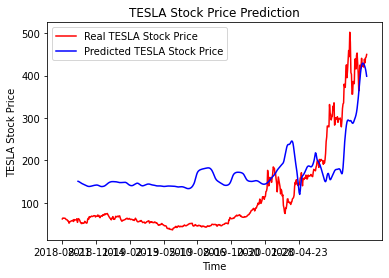

In [135]:
#Bubild the LSTM Model

model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.05))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.05))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.05))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100))
model.add(Dropout(0.05))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 300, batch_size = 32)

# Getting the predicted stock price of 2017
dataset_train = df.iloc[:800-p, 1:2]
dataset_test = df.iloc[800-p:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
Y_test = []
for i in range(60, 588-p):
    X_test.append(inputs[i-60:i, 0])
    Y_test.append(inputs[i, 0])
X_test = np.array(X_test)
Y_test = np.array(Y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
print(Y_test.shape)
# (459, 60, 1)

#Make Predictions using the test set
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price.shape)

# Visualising the results
plt.plot(df.loc[800-p:, "Date"],dataset_test.values, color = "red" , label = "Real TESLA Stock Price")
plt.plot(df.loc[800+p:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,459,60))
plt.title("TESLA Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("TESLA Stock Price")
plt.legend()
plt.show()